In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


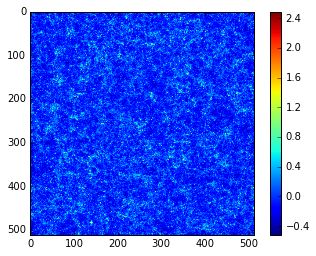

In [2]:
NData = 512
data_actual = np.fromfile('build/data_actual.dat', dtype='f8').reshape([NData, NData])
imshow(data_actual)
colorbar()

[]

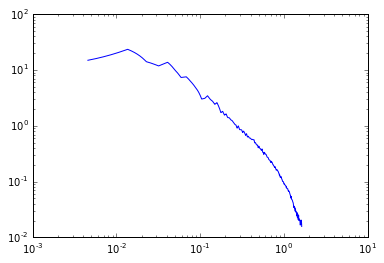

In [3]:
data_ps = np.loadtxt('build/data_ps.txt', dtype = 'f8')
plt.plot(data_ps[:,0], data_ps[:,1])
plt.loglog()

In [4]:
folder = 'build/hmc_1024_new/'
k_bins = np.loadtxt('%sk_bins.txt' % folder)

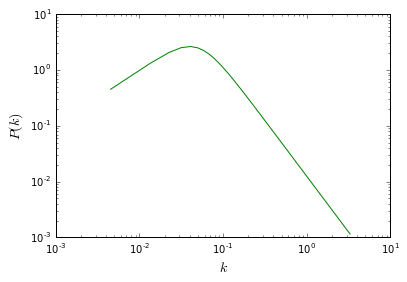

In [5]:
actual_ps = np.loadtxt('%sactual_ps.txt' % folder)
plt.plot(k_bins, actual_ps, 'g')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('$P(k)$', fontsize = 14)
plt.loglog()
plt.savefig('pk_1024.eps')

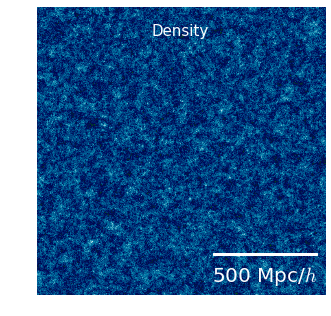

In [6]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

def plot_image(matrix, cmap = cm.ocean, sizebar = True, text = '', colorbar = False, useAx = None, text_start_pos = 0.4):
    N = int(np.sqrt(len(matrix)))
    matrix = matrix.reshape([N, N])

    fig = figure(figsize=(4,4), dpi=128)
    if useAx == None:
        ax = fig.add_axes([0,0,1,1])
    else:
        ax = useAx
        ax.cla()
    
    ax.set_axis_off()
    im = ax.imshow(matrix, cmap=cmap, extent=(0,1380,0,1380))

    if colorbar:
        fig.colorbar(im)
        
    asb =  AnchoredSizeBar(ax.transData,
                             500,
                             '500 Mpc/$h$',
                             loc=4,
                             pad=0.1, borderpad=0.5, sep=10,
                             frameon=False, color = 'white', size_vertical = 10)

    fontsize = 20
    color = 'white'
    if color is not None:
        for r in asb.size_bar.findobj(Rectangle):
            r.set_edgecolor(color)
        for t in asb.txt_label.findobj(Text):
            t.set_color(color)
    if fontsize is not None:
        for t in asb.txt_label.findobj(Text):
            t.set_fontsize(fontsize)

    if sizebar:
        ax.add_artist(asb)
        
    if text != '':
        ax.text(text_start_pos, 0.9, text, color = 'white', fontsize = 15, transform = ax.transAxes)
  
    return ax, im


delta_x = np.fromfile('%sdeltax2.dat' % folder, dtype='f8')
plot_image(delta_x, text = 'Density')
#colorbar()
savefig('data_clean.png', dpi = 128)

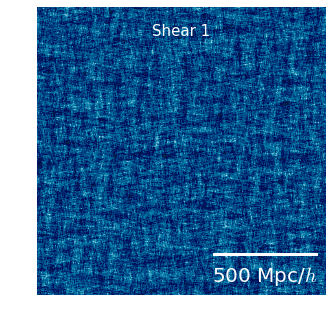

In [7]:
gamma1 = np.fromfile('%sdata_gamma1.dat' % folder, dtype='f8')
plot_image(gamma1, text = "Shear 1")
#colorbar()
savefig('gamma1_clean.png')

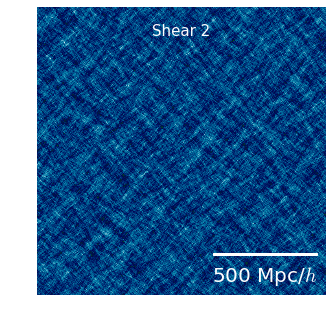

In [8]:
gamma2 = np.fromfile('%sdata_gamma2.dat' % folder, dtype='f8')
plot_image(gamma2, text = "Shear 2")
#colorbar()
savefig('gamma2_clean.png')

[]

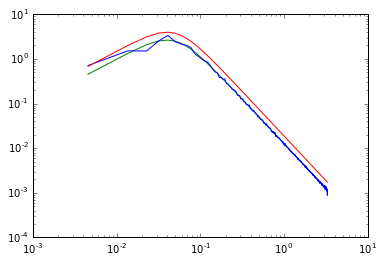

In [9]:
delta_ps = np.loadtxt('%sdelta_ps.txt' % folder)
fiducial_ps = np.loadtxt('%sfiducial_ps.txt' % folder)
plt.plot(k_bins, actual_ps, 'g')
plt.plot(k_bins, delta_ps, 'b')
plt.plot(k_bins, fiducial_ps, 'r')
plt.loglog()

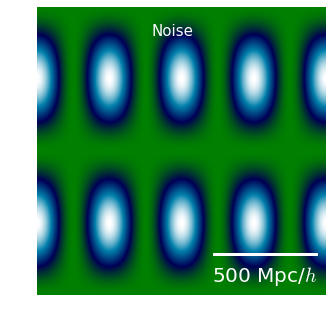

In [10]:
sigma_noise = np.fromfile('%ssigmax2.dat' % folder, dtype='f8')
ax = plot_image(sigma_noise, text = "Noise")
savefig('sigma_noise.png')

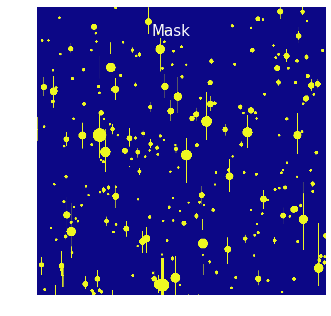

In [11]:
mask = np.fromfile('%smask2.dat' % folder, dtype='f8')
plot_image(mask, cmap = cm.plasma_r, sizebar = False, text = "Mask")
savefig('mask.png')

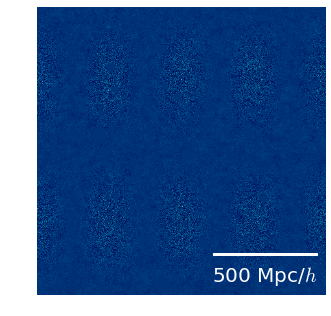

In [12]:
datax2 = np.fromfile('%sdatax2.dat' % folder, dtype='f8')
plot_image(datax2*mask)
savefig('data_noisy_masked.png')

In [13]:
delta_x_higher = np.fromfile('%sdeltax2_higher.dat' % folder, dtype='f8').reshape([N, N])
imshow(delta_x_higher)
colorbar()

IOError: [Errno 2] No such file or directory: 'build/hmc_1024_new/deltax2_higher.dat'

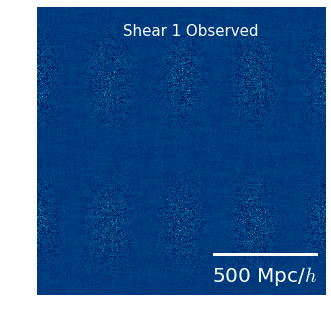

In [13]:
gamma1_noisy = np.fromfile('%sdata_gamma1_noisy.dat' % folder, dtype='f8')
plot_image(gamma1_noisy * mask, text = "Shear 1 Observed", text_start_pos = 0.3)
savefig('gamma1_noisy_masked.png')

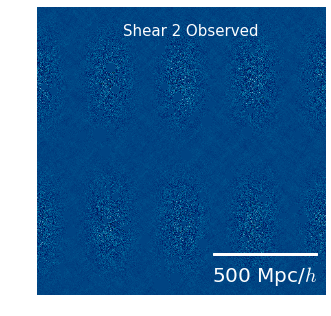

In [14]:
gamma2_noisy = np.fromfile('%sdata_gamma2_noisy.dat' % folder, dtype='f8')
plot_image(gamma2_noisy * mask, text = "Shear 2 Observed", text_start_pos = 0.3)
savefig('gamma2_noisy_masked.png')

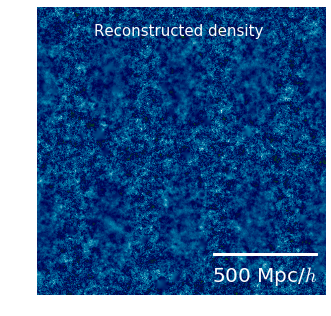

In [15]:
delta_x_min = np.fromfile('%sdeltax2min.dat' % folder, dtype='f8')
plot_image(delta_x_min, text = 'Reconstructed density', text_start_pos = 0.2)
savefig('lbfgs_solution.png')

In [17]:
wfx = np.fromfile('%swfx2.dat' % folder, dtype='f8')
plot_image(wfx, text = "Wiener filter", text_start_pos = 0.35)
savefig('wiener_filter_solution.png')

IOError: [Errno 2] No such file or directory: 'build/hmc_1024_new/wfx2.dat'

In [18]:
def compare(actual, expected):
    absdiff = np.abs(actual - expected)
    abs_expected = np.abs(expected)
    abs_expected[abs_expected < 1e-10] = 1.
    ratio = absdiff / abs_expected
    return ratio.max()

In [19]:
N = int(np.sqrt(len(delta_x_min)))
compare(np.fft.rfft2(delta_x_min.reshape((N, N))), np.fft.rfft2(wfx.reshape((N, N))))

NameError: name 'wfx' is not defined

In [20]:
print np.fft.rfft2(delta_x_min.reshape((N, N)))[0,0]
print np.fft.rfft2(wfx.reshape((N, N)))[0,0]

(-1.7763568394e-14+0j)


NameError: name 'wfx' is not defined

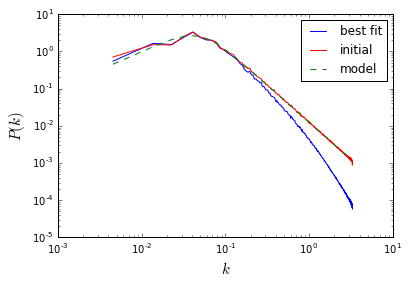

In [21]:
delta_min_ps = np.loadtxt('%sdelta_min_ps.txt' % folder)
plt.plot(k_bins, delta_min_ps, 'b', label = 'best fit')
plt.plot(k_bins, delta_ps, 'r', label = 'initial')
plt.plot(k_bins, actual_ps, 'g--', label = 'model')
plt.loglog()
plt.legend()
plt.xlabel('$k$', fontsize = 15)
plt.ylabel('$P(k)$', fontsize = 15)
plt.savefig('power_spectrum_min.png')

In [22]:
wf_ps = np.loadtxt('%swf_ps.txt' % folder)
plt.plot(k_bins, wf_ps)
plt.loglog()

IOError: [Errno 2] No such file or directory: 'build/hmc_1024_new/wf_ps.txt'

In [23]:
plt.plot(k_bins, delta_min_ps / wf_ps)
plt.axis([None, None, 0, 1.1])
plt.xlabel('$k$')
plt.savefig('transfer_lbfgs_wf.png')

NameError: name 'wf_ps' is not defined

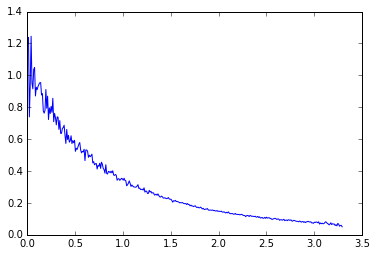

In [24]:
plt.plot(k_bins, delta_min_ps / actual_ps)
#plt.axis([None, None, 0, 1.5])

In [25]:
q = np.loadtxt('%sq.txt' % folder).reshape([N / 4, N / 4])
imshow(q)
colorbar()

IOError: [Errno 2] No such file or directory: 'build/hmc_1024_new/q.txt'

In [26]:
imshow(data_x[:N/4,:N/4])
colorbar()

NameError: name 'data_x' is not defined

In [27]:
imshow(q / data_x[:N/4,:N/4])
colorbar()
print q / data_x[:N/4,:N/4]

NameError: name 'q' is not defined

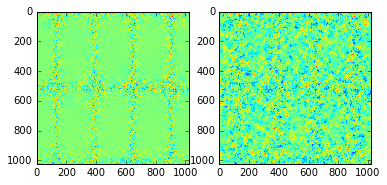

In [28]:
def plotIteration(i, fileName):
    plt.subplot(1, 2, 1)
    delta_x_0 = np.fromfile('%slbfgs_lin_iter_%d.dat' % (folder, i), dtype='f8').reshape([N, N])
    imshow(delta_x_0)
    plt.subplot(1, 2, 2)
    imshow(delta_x_min.reshape([N, N]))
    plt.savefig(fileName)
    
plotIteration(0, 'lbfgs_iter_0.png')
plotIteration(1, 'lbfgs_iter_1.png')

1001
101  iterations


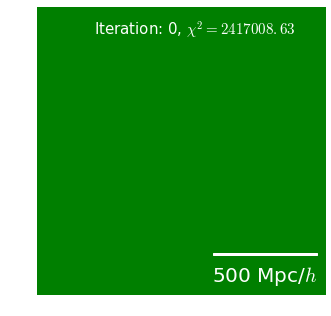

In [31]:
from matplotlib import animation
import os.path

def createAnimation(hmc = False):
    fig = figure(figsize=(4,4), dpi=128)
    ax = fig.add_axes([0,0,1,1])
    
    it = 0
    while True:
        filename = '%slbfgs_lin_iter_%d.dat' % (folder, it)
        if hmc:
            filename = '%shmc_lin_iter_%d.dat' % (folder, it)
        if os.path.exists(filename):
            it += 1
        else:
            break
            
    chi2 = np.loadtxt('%schi2.txt' % folder)
    if hmc:
        chi2 = np.loadtxt('%shmc_chi2.txt' % folder)
    print len(chi2)
            
    print it, ' iterations'
    
    def animate(i):
        filename = '%slbfgs_lin_iter_%d.dat' % (folder, i)
        if hmc:
            filename = '%shmc_lin_iter_%d.dat' % (folder, i)
        text = 'Iteration: %d, $\chi^2 = %.2f$' % (i, chi2[i,1])
        mat = np.fromfile(filename, dtype='f8')
        ax1, im  = plot_image(mat, useAx = ax, text = text, text_start_pos = 0.2)
        return im
    
    def init():
        return animate(0)
    
    if hmc:
        it = max(it, 100)
    anim = animation.FuncAnimation(fig, animate, init_func = init, frames = it, interval = 10)
    return anim

#anim = createAnimation()
#anim.save('lbfgs_iterations.mp4', fps = 5)

anim = createAnimation(hmc = True)
anim.save('hmc_iterations.mp4', fps = 5)

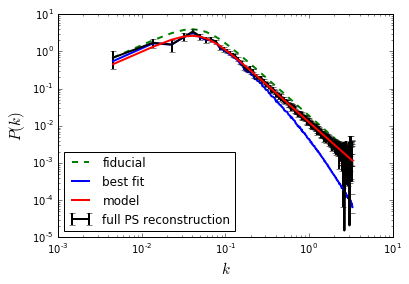

In [50]:
c = 0
window_est = np.loadtxt('%swindow_est_%d.txt' % (folder, c))
theta_est = np.loadtxt('%stheta_est_%d.txt' % (folder, c))
theta_error = np.loadtxt('%stheta_error_%s.txt' % (folder, c))
plt.plot(k_bins, np.dot(window_est, fiducial_ps), 'g--', label = 'fiducial', lw = 2)
plt.plot(k_bins, np.dot(window_est, delta_min_ps), 'b', label = 'best fit', lw = 2)
#plt.plot(k_bins, np.dot(window_est, delta_ps), color = 'cyan', label = 'initial (truth)', lw = 2)
plt.errorbar(k_bins, theta_est, yerr = theta_error, label = 'full PS reconstruction', color = 'black', lw = 2)
plt.plot(k_bins, np.dot(window_est, actual_ps), 'r', label = 'model', lw = 2)
plt.legend(loc = 3)
plt.loglog()
plt.xlabel('$k$', fontsize = 15)
plt.ylabel('$P(k)$', fontsize = 15)
plt.savefig('power_spectrum_reconstructed.eps')

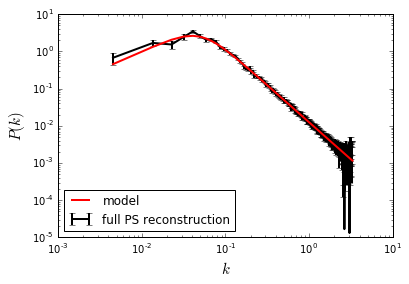

In [57]:
c = 0
folder1 = 'build/hmc_1024/'
window_est1 = np.loadtxt('%swindow_est_%d.txt' % (folder1, c))
theta_est1 = np.loadtxt('%stheta_est_%d.txt' % (folder1, c))
theta_error1 = np.loadtxt('%stheta_error_%s.txt' % (folder1, c))
#plt.plot(k_bins, np.dot(window_est1, fiducial_ps), 'g--', label = 'fiducial', lw = 2)
#plt.plot(k_bins, np.dot(window_est1, delta_min_ps), 'b', label = 'best fit', lw = 2)
#plt.plot(k_bins, np.dot(window_est1, delta_ps), color = 'cyan', label = 'initial (truth)', lw = 2)
#plt.errorbar(k_bins, theta_est, yerr = theta_error, label = 'full PS reconstruction', color = 'green', lw = 2)
plt.errorbar(k_bins, theta_est1, yerr = theta_error1, label = 'full PS reconstruction', color = 'black', lw = 2)
plt.plot(k_bins, np.dot(window_est1, actual_ps), 'r', label = 'model', lw = 2)
plt.legend(loc = 3)
plt.loglog()
plt.xlabel('$k$', fontsize = 15)
plt.ylabel('$P(k)$', fontsize = 15)
plt.savefig('power_spectrum_reconstructed_fix_fid.eps')


## plot $\chi^2$ as a function of iterations

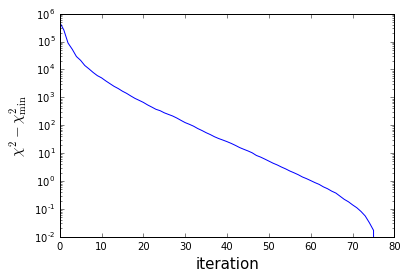

In [80]:
chi2 = np.loadtxt('%schi2.txt' % folder)
plt.plot(chi2[:,0], chi2[:,1] - chi2[-1,1])
plt.yscale('log')
plt.xlabel('iteration', fontsize=15)
plt.ylabel('$\chi^2-\chi_\min^2$', fontsize=15)
plt.savefig('chi2.eps')

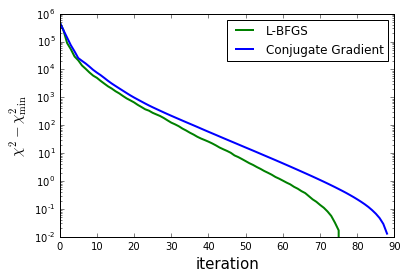

In [34]:
chi2 = np.loadtxt('%schi2.txt' % folder)
cg_chi2 = np.loadtxt('%scg_chi2.txt' % folder)
hmc_chi2 = np.loadtxt('%shmc_chi2.txt' % folder)
plt.plot(chi2[:,0], chi2[:,1] - chi2[-1,1], 'g', lw = 2, label = "L-BFGS")
plt.plot(cg_chi2[:,0], cg_chi2[:,1] - chi2[-1,1], 'b', lw = 2, label = "Conjugate Gradient")
plt.legend()
plt.yscale('log')
plt.xlabel('iteration', fontsize=15)
plt.ylabel('$\chi^2-\chi^2_\min$', fontsize=15)
plt.savefig('chi2.eps')

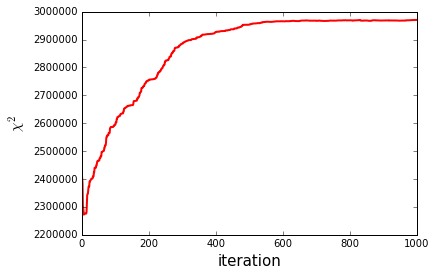

In [36]:
plt.plot(hmc_chi2[:,0], hmc_chi2[:,1], 'r', lw = 2, label = "HMC")
plt.xlabel('iteration', fontsize=15)
plt.ylabel('$\chi^2$', fontsize=15)
plt.savefig('hmc_chi2.eps')

In [45]:
hmc_powers_list = []
it = 0
while True:
    filename = '%shmc_ps_%d.txt' % (folder, it)
    if os.path.exists(filename):
        hmc_powers_list.append(np.loadtxt(filename))
        it += 1
    else:
        break

hmc_powers = np.array(hmc_powers_list)
hmc_powers = hmc_powers[200:,:]
print hmc_powers.shape

(801, 363)


In [46]:
hmc_powers_mean = hmc_powers.mean(axis = 0)
hmc_powers_std = hmc_powers.std(axis = 0)
print hmc_powers_mean.shape
print len(k_bins)

(363,)
363


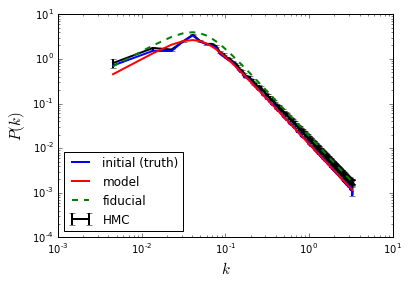

In [48]:
plt.errorbar(k_bins, hmc_powers_mean, yerr = hmc_powers_std, label = 'HMC', color = 'black', lw = 2)
plt.plot(k_bins, delta_ps, color = 'blue', label = 'initial (truth)', lw = 2)
plt.plot(k_bins, actual_ps, 'r', label = 'model', lw = 2)
plt.plot(k_bins, fiducial_ps, 'g--', label = 'fiducial', lw = 2)
plt.legend(loc = 3)
plt.loglog()
plt.xlabel('$k$', fontsize = 15)
plt.ylabel('$P(k)$', fontsize = 15)
plt.savefig('hmc_power_spectrum_reconstructed.eps')

In [29]:
c = 0
strIter = str(c)

In [30]:
bl = np.loadtxt('%sbl.txt' % folder)
plot(k_bins, bl, 'g', label='$b_l$ Linear Algebra')
bEst = np.loadtxt('%sb_est_%d.txt' % (folder, c))
plot(k_bins, bEst, 'b', label = '$b_l$ Estimated')
plt.xlabel('$k$')
plt.legend(loc=2)
plt.loglog()
plt.savefig('noise_bias.png')

IOError: [Errno 2] No such file or directory: 'build/hmc_1024_new/bl.txt'

[ 1.08815428  0.8335632   0.91672958  0.87241242  0.86851408  1.03764016
  0.96429608  1.12421888  1.01851663  1.01281497  0.96857014  0.979245
  1.02248802  1.02931405  0.99682394  1.00605898  0.99889941  1.06321307
  1.00361046  0.9130185   1.0073584   1.01043361  1.06193852]


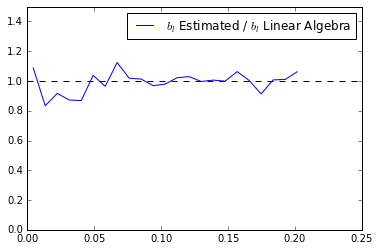

In [37]:
plot(k_bins, bEst / bl, label = '$b_l$ Estimated / $b_l$ Linear Algebra')
plt.axis([None, None, 0, 1.5])
plt.hlines(1.0, 0, 0.25, linestyles='dashed')
plt.legend(loc = 1)
plt.savefig('noise_bias_ratio.png')
print bEst / bl

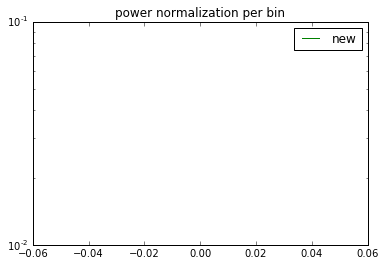

In [47]:
import os.path

it = 0
b_ratio = []
while True:
    b_est_filename = '%sb_est_%d.txt' % (folder, it)
    if os.path.exists(b_est_filename):
        b_est_current = np.loadtxt(b_est_filename)
        b_ratio_current = b_est_current / bl
        b_ratio.append(np.average(np.abs(b_ratio_current - 1.)))
        it += 1
    else:
        break
        
#b_ratio1 = b_ratio
#plt.plot(b_ratio1, 'b', label = 'old')
plt.plot(b_ratio, 'g', label = 'new')
plt.yscale('log')
plt.legend()
#plt.xscale('log')
plt.title('power normalization per bin')
plt.savefig('noise_convergence_bin.png')

In [48]:
gibbs_ps = np.loadtxt('%sgibbs_ps_avg_0.txt' % folder)
plt.plot(k_bins, gibbs_ps, 'b')
plt.plot(k_bins, actual_ps, 'g')
plt.plot(k_bins, delta_ps, 'r')
plt.plot(k_bins, delta_min_ps, 'y')
plt.loglog()

IOError: [Errno 2] No such file or directory: 'build/test_64/gibbs_ps_avg_0.txt'

In [49]:
plt.plot(gibbs_ps / actual_ps)

NameError: name 'gibbs_ps' is not defined

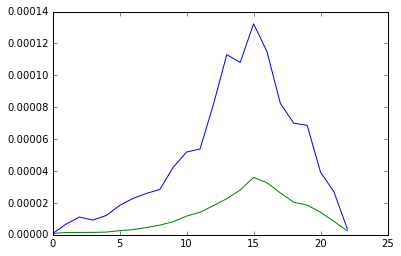

In [50]:
signal = np.loadtxt('%ssignal.txt' % folder)
plot(signal)
plot(bl)

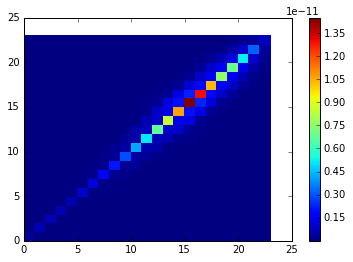

In [309]:
fisher = np.loadtxt('%sfisher.txt' % folder)
pcolor(fisher)
colorbar()
plt.savefig('fisher_linear.png')

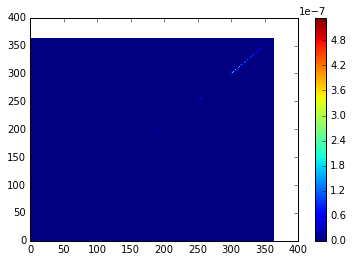

In [31]:
c = 0
fisher_est = np.loadtxt('%sfisher_est_%d.txt' % (folder, c))
#fisher_est1 = fisher_est
pcolor(fisher_est)
colorbar()
plt.savefig('fisher_estimated.png')

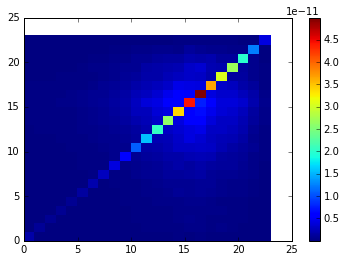

In [224]:
c = 1023
fisher_new_est = np.loadtxt('%sfisher_new_est_%d.txt' % (folder, c))
#fisher_est1 = fisher_est
pcolor(fisher_new_est)
colorbar()
plt.savefig('fisher_new_estimated.png')

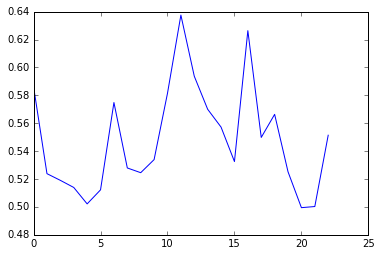

In [225]:
plot(np.diag(fisher_new_est) / np.diag(fisher))
savefig('fisher_diag_ratio.png')

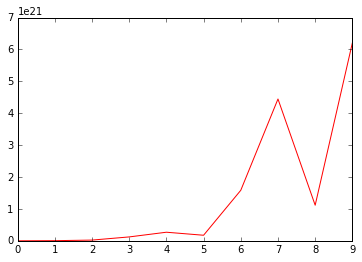

In [56]:
plot(fisher[3,:10], 'b')
plot(fisher_est[3,:10], 'g')
plot(fisher_new_est[3,:10], 'r')

In [51]:
plot(np.diag(fisher_est - fisher_est1) / np.diag(fisher_est1))

NameError: name 'fisher_est1' is not defined

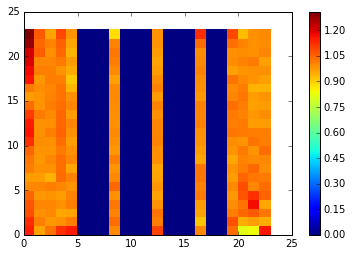

In [52]:
fisher_ratio = fisher_est / fisher
pcolor(fisher_ratio)
colorbar()
plt.savefig('fisher_ratio.png')

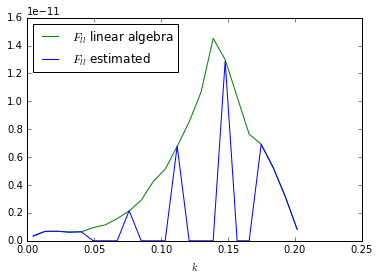

In [53]:
plot(k_bins, np.diag(fisher), 'g', label= "$F_{ll}$ linear algebra")
plot(k_bins, np.diag(fisher_est), 'b', label = "$F_{ll}$ estimated")
plt.xlabel('$k$')
plt.legend(loc=2)
plt.savefig('fisher_diagonal.png')

[ 1.14699243  1.01803701  1.00131041  0.99172892  1.01293575  0.          0.
  0.          1.01407627  0.          0.          0.          1.00351288
  0.          0.          0.          0.99240826  0.          0.
  0.99702861  0.99691342  0.99065598  1.00081454]


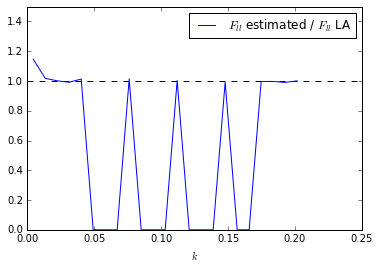

In [54]:
plot(k_bins, np.diag(fisher_est) / np.diag(fisher), label = "$F_{ll}$ estimated / $F_{ll}$ LA")
plt.axis([None, None, 0, 1.5])
plt.hlines(1.0, 0, 0.25, linestyles='dashed')
plt.xlabel('$k$')
plt.legend(loc=1)
plt.savefig("fisher_diagonal_ratio.png")

print np.diag(fisher_est) / np.diag(fisher)

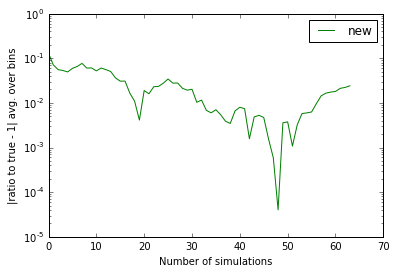

In [55]:
it = 0
f_ratio = []
while True:
    f_est_filename = 'build/fisher_est_' + str(it) + '.txt'
    if os.path.exists(f_est_filename):
        f_est_current = np.loadtxt(f_est_filename)
        f_ratio_current = np.diag(f_est_current) / np.diag(fisher)
        #f_ratio.append(np.average(np.abs(f_ratio_current - 1.)))
        f_ratio.append(np.abs(f_ratio_current[1] - 1.))
        it += 1
    else:
        break
        
f_ratio1 = f_ratio
        
plt.plot(f_ratio, 'g', label = "new")
#plt.plot(f_ratio1, 'b', label = "old")
plt.legend()
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Number of simulations')
plt.ylabel('|ratio to true - 1| avg. over bins')
plt.savefig('convergence.png')

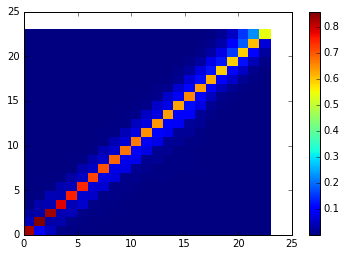

In [311]:
window = np.loadtxt('%swindow.txt' % folder)
    
pcolor(window)
colorbar()

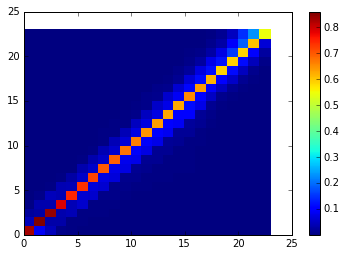

In [312]:
window_est = np.loadtxt('%swindow_est_%d.txt' % (folder, c))
#window_est1 = window_est
    
pcolor(window_est)
colorbar()

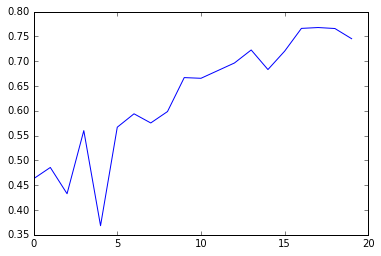

In [138]:
plot(np.diag(window_est[0:20]))

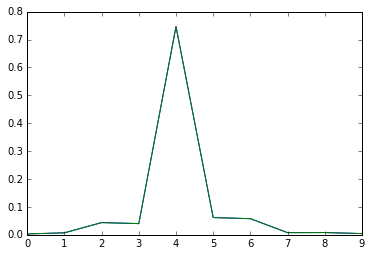

In [323]:
plot(window_est[4,:10])
plot(window_est[4,:10])

[]

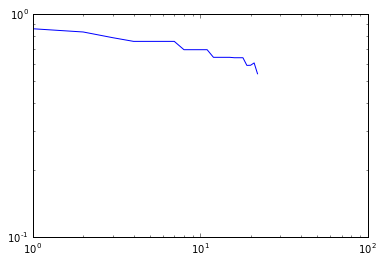

In [60]:
plot(np.diag(window_est))
plt.loglog()

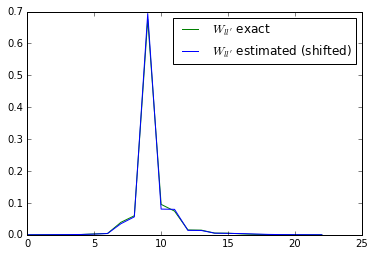

In [61]:
l1 = 9
plot(window[l1,:], 'g', label = "$W_{ll^\prime}$ exact")
plot(window_est[l1,:], 'b', label = "$W_{ll^\prime}$ estimated (shifted)")
plt.legend()
plt.savefig("window.png")

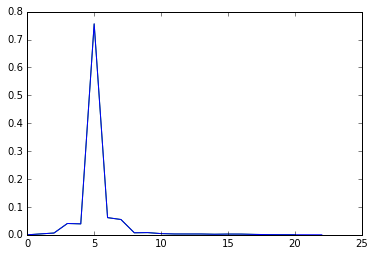

In [62]:
plot(window_est[7,2:], 'g')
plot(window_est[5,:], 'b')

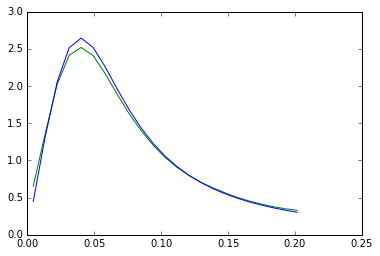

In [315]:
actual_ps_convolved = np.dot(window, actual_ps)
plt.plot(k_bins, actual_ps_convolved, 'g')
plt.plot(k_bins, actual_ps, 'b')
#plt.loglog()

[]

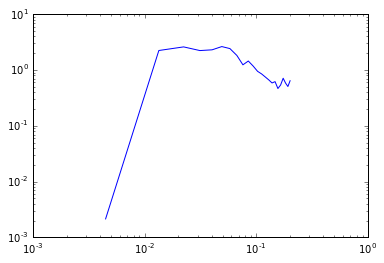

In [268]:
theta = np.loadtxt('%stheta.txt' % folder)
plt.plot(k_bins, theta)
plt.loglog()

In [269]:
L = 1380.
error = np.sqrt(np.diag(window) / np.sum(fisher, axis = 1)) / L**2
print error

[ 0.77347853  0.54957871  0.52830546  0.52239194  0.49437194  0.40157607
  0.35407918  0.29310165  0.24738628  0.20821666  0.17006446  0.15004879
  0.12934396  0.11409418  0.10128688  0.09069541  0.09318504  0.10192221
  0.11287109  0.11790897  0.13533758  0.17778565  0.31216996]


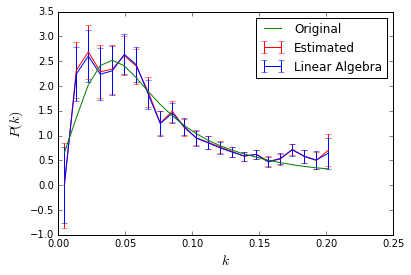

In [326]:
c = 31
theta_est = np.loadtxt('%stheta_est_%d.txt' % (folder, c))
theta_error = np.loadtxt('%stheta_error_%d.txt' %(folder, c))
plt.errorbar(k_bins, theta_est, yerr = theta_error, color = 'r', label = 'Estimated')
plt.errorbar(k_bins, theta, yerr = error, color = 'b', label = 'Linear Algebra')
plt.plot(k_bins, actual_ps_convolved, 'g', label = 'Original')
#plt.plot(k_bins, delta_ps, 'k--', label = 'Realization')
#plt.plot(k_bins, delta_min_ps, 'b--', label = 'WF')
#plt.plot(k_bins, fiducial_ps, 'g--', label = 'WF')
plt.legend(loc = 1)
#plt.loglog()
plt.xlabel('$k$', fontsize = 14)
plt.ylabel('$P(k)$', fontsize = 14)
plt.savefig('pk_quad_estimator.eps')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


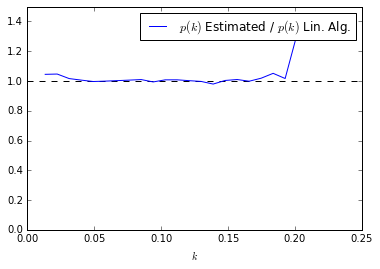

In [253]:
plt.plot(k_bins, theta_est / theta, label = '$p(k)$ Estimated / $p(k)$ Lin. Alg.')
plt.legend()
plt.axis([None, None, 0, 1.5])
plt.xlabel('$k$')
plt.hlines(1.0, 0, 0.25, linestyles='dashed')
plt.savefig('pk_quad_est_ratio.png')

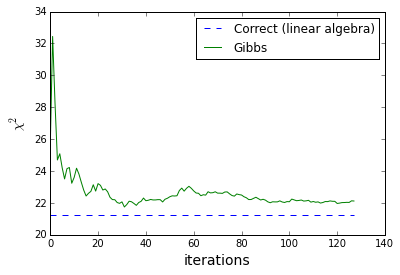

In [337]:
import os.path

it = 0
pk_chi2 = []
while True:
    theta_est_filename = 'build/theta_est_' + str(it) + '.txt'
    if os.path.exists(theta_est_filename):
        theta_est_current = np.loadtxt(theta_est_filename)
        diff = theta - actual_ps_convolved
        chi2 = np.sum(diff**2 / error**2)
        pk_chi2.append(chi2)
        it += 1
    else:
        break
        
pk_chi2_1 = np.loadtxt('build/pk_chi2.txt')
pk_chi2_2 = pk_chi2_1

plt.plot(pk_chi2, 'b--', label = 'Correct (linear algebra)')
plt.plot(pk_chi2_1, 'g', label = 'Gibbs')
#plt.plot(pk_chi2_2, 'r', label = 'non-Gibbs')
plt.legend()
plt.ylabel('$\chi^2$', fontsize=14)
plt.xlabel('iterations', fontsize=14)

[None, None, 0, 2]

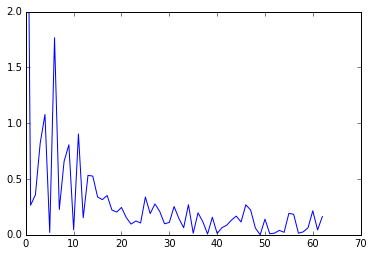

In [1238]:
plot(np.abs(pk_chi2_1[1:] - pk_chi2_1[:-1]))
plt.axis([None, None, 0, 2])

<matplotlib.colorbar.Colorbar instance at 0x10746f8c0>

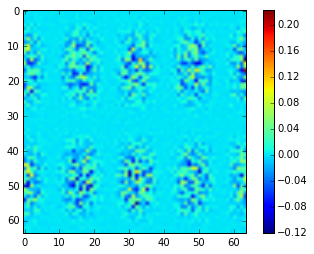

In [74]:
diff = np.loadtxt('build/gibbs_diff.txt').reshape([N, N])
imshow(diff)
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x106f4f638>

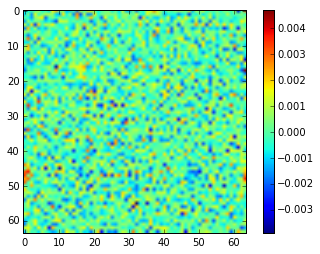

In [75]:
diff1 = np.loadtxt('build/gibbs_diff1.txt').reshape([N, N])
imshow(diff1)
colorbar()

In [79]:
inv_hess_test_vec = np.loadtxt('build/inv_hess_test_vec.txt')
inv_hess_test_vec_est = np.loadtxt('build/inv_hess_test_vec_est.txt')
print inv_hess_test_vec[:10]
print inv_hess_test_vec_est[:10]

[ -1.20037000e-06  -1.50376000e-02   6.35202000e-02   2.99629000e-02
   4.31353000e-02  -4.74607000e-02   3.19000000e-02  -5.30166000e-02
   1.04011000e-01  -3.79696000e-02]
[ -63487.5  -13333.8  122494.    22032.1   35969.3  -35146.6   46563.1
 -124860.    85193.2  -31607.4]


<matplotlib.colorbar.Colorbar instance at 0x1062805a8>

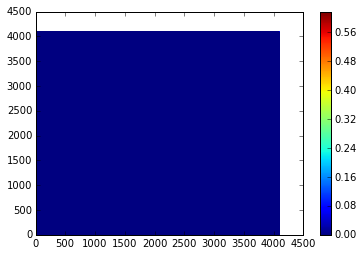

In [82]:
inv_hess = np.loadtxt('build/inv_hessian.txt')
pcolor(inv_hess)
colorbar()

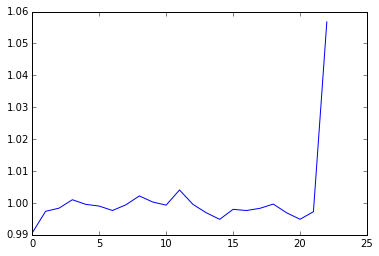

In [1272]:
myIter = 10
p_factor_1 = np.loadtxt('build/theta_factor_' + str(myIter) + '.txt')
p_factor_2 = np.loadtxt('build/theta_factor_' + str(60) + '.txt')
plt.plot(p_factor_2 / p_factor_1)

ValueError: x and y must have same first dimension

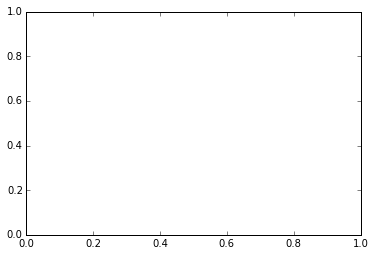

In [746]:
theta_avg = np.loadtxt('build/theta_avg.txt')
plt.plot(k_bins, theta_avg, 'g')
plt.plot(k_bins, actual_ps_convolved, 'b')
plt.loglog()

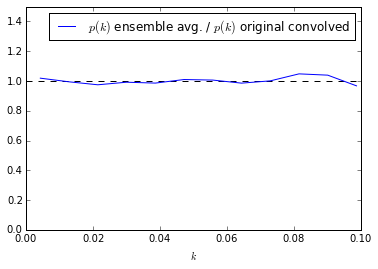

In [695]:
plt.plot(k_bins, theta_avg / actual_ps_convolved, label = '$p(k)$ ensemble avg. / $p(k)$ original convolved')
plt.axis([None, None, 0, 1.5])
plt.xlabel('$k$')
plt.legend()
plt.hlines(1.0, 0, 0.25, linestyles='dashed')
#print theta_avg/actual_ps_convolved
plt.savefig('pk_ens_avg_over_actual_convolved.png')

[]

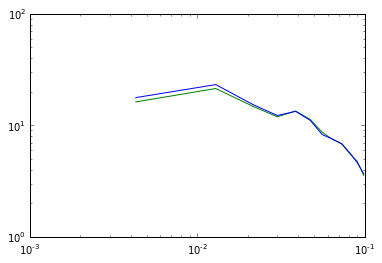

In [168]:
delta_pk_avg = np.loadtxt('build/delta_pk_avg.txt')
plt.plot(k_bins, delta_pk_avg, 'g')
plt.plot(k_bins, actual_ps, 'b')
plt.loglog()

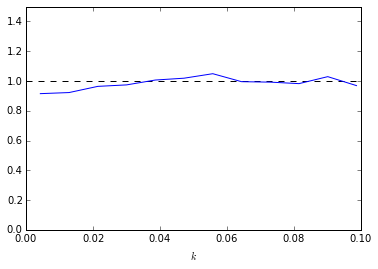

In [169]:
plt.plot(k_bins, delta_pk_avg / actual_ps)
plt.axis([None, None, 0, 1.5])
plt.xlabel('$k$')
plt.hlines(1.0, 0, 0.25, linestyles='dashed')

In [471]:
def fftk(shape, boxsize, symmetric=True):
    k = []
    for d in range(len(shape)):
        kd = numpy.fft.fftfreq(shape[d])
        kd *= 2 * numpy.pi / boxsize * shape[d]
        kdshape = numpy.ones(len(shape), dtype='int')
        if symmetric and d == len(shape) -1:
            kd = kd[:shape[d]//2 + 1]
        kdshape[d] = len(kd)
        kd = kd.reshape(kdshape)
        
        k.append(kd)
    kk = sum([i ** 2 for i in k])
    return kk ** 0.5

In [472]:
def power(f1, f2=None, boxsize=1.0):
    c1 = numpy.fft.rfftn(f1)
    c1 /= c1[0, 0].real
    c1[0, 0] = 0
    if f2 is not None:
        c2 = numpy.fft.rfftn(f2)
        c2 /= c2[0, 0].real
        c2[0, 0] = 0
    else:
        c2 = c1
    x = (c1 * c2.conjugate()).real
    del c1
    del c2
    k = fftk(f1.shape, boxsize)
    print k.min(), k.max()
    w = numpy.ones(k.shape, dtype='f4')
    n = f1.shape[0]
    w[:, 0] = 0.5
    w[0,0] = 1
    w[n/2, 0] = 1
    w[:, -1] = 0.5
    w[0, -1] = 1
    w[n/2, -1] = 1
    x *= w
    H, edges = numpy.histogram(k.flat, weights=x.flat, bins=int(math.ceil(float(n / 2) / np.sqrt(2)))) 
    N, edges = numpy.histogram(k.flat, weights=w.flat, bins=edges)
    center= edges[1:] + edges[:-1]
    
    return 0.5 * center, H / N / boxsize**2